In [9]:
import pandas as pd
from ta import *
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import math
from math import sqrt 
sns.set()

# Read USD/KZT prices
df = pd.read_csv("USD_KZT Historical Data.csv", header=0, index_col=0, parse_dates=[0])
df = df.rename(columns={"Price":"Close"})
df = df.iloc[::-1]
sns.set()

In [10]:
# EXTRACT TECHNICAL INDICATORS
import ta

close = df['Close']
high = df['High']
low = df['Low']

# MOMENTUM INDICATORS
#df['ROC'] = ta.momentum.roc(close, n = 12, fillna=False)
df['RSI'] = ta.momentum.rsi(close, n = 20, fillna=True)
df['SO'] = ta.momentum.stoch(high, low, close, n = 20, fillna=True)

#df['Williams'] = ta.momentum.wr(high, low, close, lbp = 20, fillna=False) #Inverse of the Fast Stochastic Oscillator.

# VOLATILITY INDICATORS
# Bollinger Bands
df['bb_high'] = ta.volatility.bollinger_hband(close, n=20, ndev=2, fillna=True)
df['bb_low'] = ta.volatility.bollinger_lband(close, n=20, ndev=2, fillna=True)
# Simple Moving Average
df['SMA'] = ta.volatility.bollinger_mavg(close, n=100, fillna=True)

#TREND INDICATORS
#Average Directional Movement Index (ADX)
df['ADX'] = ta.trend.adx(high, low, close, n=10, fillna=True)
# Commodity Channel Index (CCI)
df['CCI'] = ta.trend.cci(high, low, close, n=20, fillna=True)
# Exponential Moving Average
df['EMA'] = ta.trend.ema_indicator(close, n=100, fillna=True)
# Ichimoku
df['Ichimoku'] = ta.trend.ichimoku_a(high, low, n1=9, n2=26, visual=False, fillna=True)
# Moving Average Convergence Divergence (MACD)
df['MACD'] = ta.trend.macd(close, n_fast=1, n_slow=25, fillna=True)
# Mass Index (MI)
df['MI'] = ta.trend.mass_index(high, low, n=10, n2=25, fillna=True)

# OTHER INDICATORS
# Daily return (DR)
df['DR'] = ta.others.daily_return(close, fillna=True)

/Users/angie/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:468: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/Users/angie/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:472: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


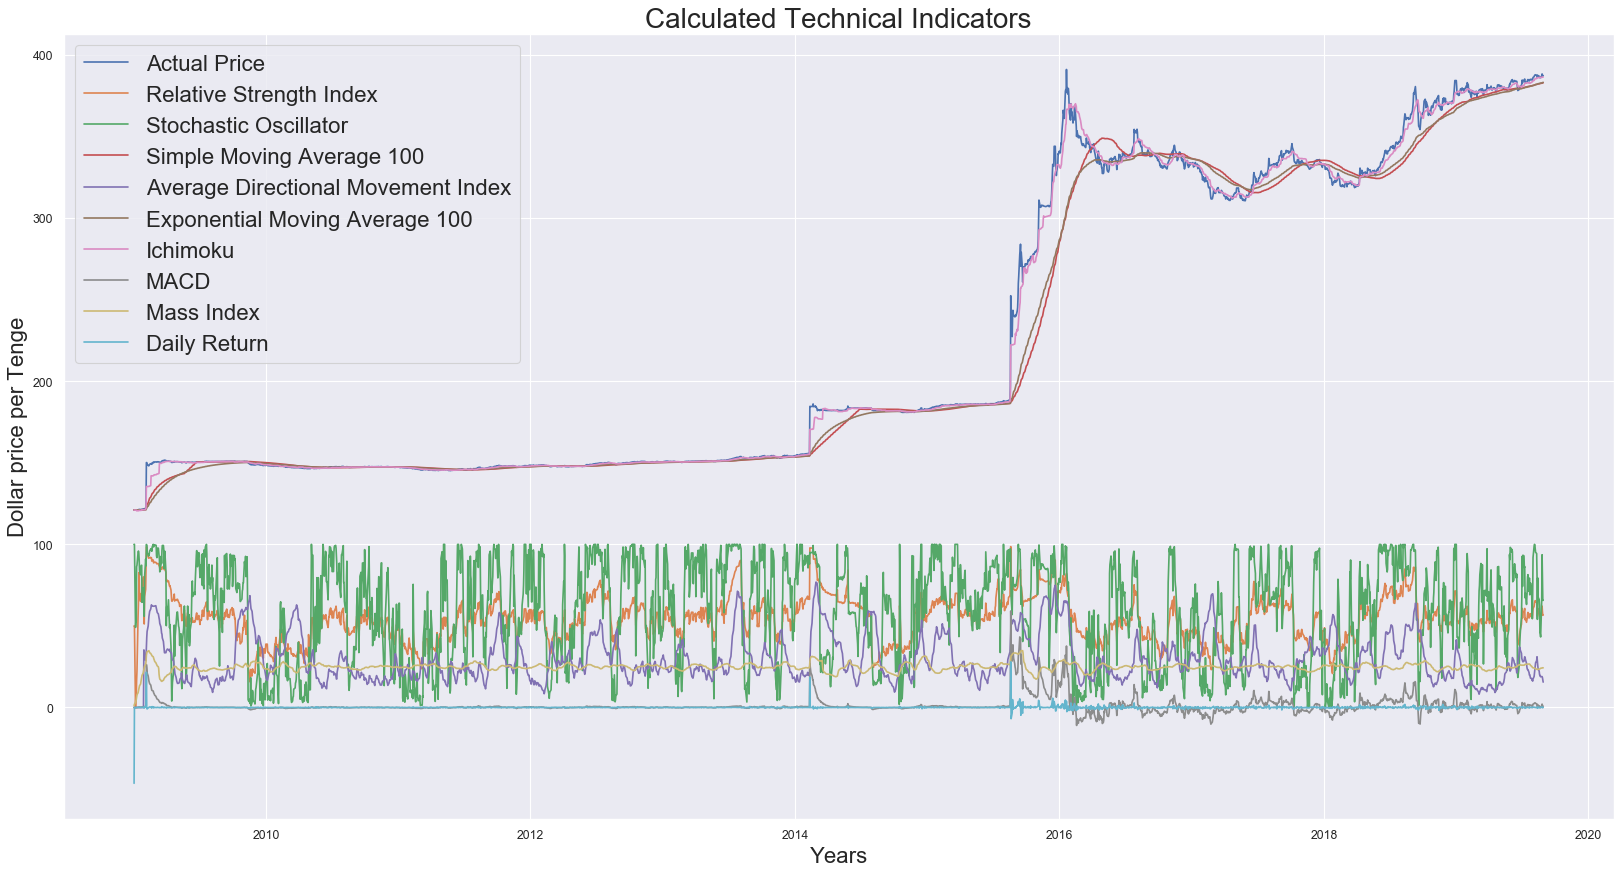

In [11]:
# Plotting

plt.figure(figsize=(25,13), dpi=80)
plt.plot(df['Close'], label='Actual Price' )

#Momentum
#plt.plot(df['bb_high'])
#plt.plot(df['bb_low'])
plt.plot(df['RSI'], label='Relative Strength Index' )
plt.plot(df['SO'], label='Stochastic Oscillator')

#Volatility
#plt.plot(df['Williams'])
plt.plot(df['SMA'], label='Simple Moving Average 100')

#Trend
plt.plot(df['ADX'], label='Average Directional Movement Index') # shows good trend change
#plt.plot(df['CCI'])
plt.plot(df['EMA'], label='Exponential Moving Average 100')
plt.plot(df['Ichimoku'], label='Ichimoku')
plt.plot(df['MACD'], label='MACD') # shows good trend change
plt.plot(df['MI'], label='Mass Index')  # shows good trend change

#Other
plt.plot(df['DR'], label='Daily Return') # shows good trend change
plt.legend(fontsize = 20)
plt.title('Calculated Technical Indicators', fontsize=25)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Dollar price per Tenge", fontsize=20)
plt.show()

In [15]:
# Data preparation for LSTM
from numpy import array
from sklearn.preprocessing import MinMaxScaler


price = np.array(df['Close'])
# Momentum
bbhigh = np.array(df['bb_high'])
bblow = np.array(df['bb_low'])
rsi = np.array(df['RSI'])
so = np.array(df['SO'])
# Volatility 
sma = np.array(df['SMA'])
# Trend
adx = np.array(df['ADX'])
cci = np.array(df['CCI'])
ema = np.array(df['EMA'])
macd = np.array(df['MACD'])
mi = np.array(df['MI'])                 
# Other
dr = np.array(df['DR'])

train_size = int(len(price)*0.8)
test_size = len(price) - train_size

train_index = np.arange(0, train_size)
test_index = np.arange(train_size, len(price))

price_train, price_test = price[train_index], price[test_index]
   
# Split  into train and test sets
bbhigh_train, bbhigh_test = bbhigh[train_index], bbhigh[test_index]
bblow_train, bblow_test = bblow[train_index], bblow[test_index]
rsi_train, rsi_test = rsi[train_index], rsi[test_index]
so_train, so_test = so[train_index], so[test_index] 
sma_train, sma_test = sma[train_index], sma[test_index] 
                 
adx_train, adx_test = adx[train_index], adx[test_index]                 
cci_train, cci_test = cci[train_index], cci[test_index]    
ema_train, ema_test = ema[train_index], ema[test_index]                    
macd_train, macd_test = macd[train_index], macd[test_index]

mi_train, mi_test = mi[train_index], mi[test_index]
dr_train, dr_test = dr[train_index], dr[test_index]

# convert to [rows, columns] structure
price_train = price_train.reshape((len(price_train), 1))
bbhigh_train = bbhigh_train.reshape(len(bbhigh_train), 1)
bblow_train = bblow_train.reshape(len(bblow_train), 1)
rsi_train = rsi_train.reshape(len(rsi_train), 1)
so_train = so_train.reshape(len(so_train), 1)
sma_train = sma_train.reshape(len(sma_train), 1)
adx_train = adx_train.reshape(len(adx_train), 1)
cci_train = cci_train.reshape(len(cci_train), 1)
ema_train = ema_train.reshape(len(ema_train), 1)
macd_train = macd_train.reshape((len(macd_train), 1))
mi_train = mi_train.reshape(len(mi_train), 1)
dr_train = dr_train.reshape(len(dr_train), 1)


price_test = price_test.reshape((len(price_test), 1))
bbhigh_test = bbhigh_test.reshape(len(bbhigh_test), 1)
bblow_test = bblow_test.reshape(len(bblow_test), 1)
rsi_test = rsi_test.reshape(len(rsi_test), 1)
so_test = so_test.reshape(len(so_test), 1)
sma_test = sma_test.reshape(len(sma_test), 1)
adx_test = adx_test.reshape(len(adx_test), 1)
cci_test = cci_test.reshape(len(cci_test), 1)
ema_test = ema_test.reshape(len(ema_test), 1)
macd_test = macd_test.reshape((len(macd_test), 1))
mi_test = mi_test.reshape(len(mi_test), 1)
dr_test = dr_test.reshape(len(dr_test), 1)


# horizontally stack columns

# Include ALL technical indicators as input channels
# train_data = np.hstack((price_train, rsi_train, so_train, \
#                         sma_train, adx_train, cci_train, ema_train, macd_train, mi_train, dr_train))
# test_data = np.hstack((price_test, rsi_test, so_test, \
#                         sma_test, adx_test, cci_test, ema_test, macd_test, mi_test, dr_test))


#Include SELECTED technical indicators as input channels
train_data = np.hstack((price_train, macd_train, dr_train)) #, adx_train,  mi_train))
test_data = np.hstack((price_test,  macd_test, dr_test)) #, adx_test, mi_test))

# # Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.fit_transform(test_data)

In [16]:
train_data.shape
test_data.shape

(557, 3)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.layers import Bidirectional
import time

# split a multivariate sequence into samples
def split_data(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Choose a number of time steps
n_steps = 10

X, y = split_data(train_data, n_steps)
X2, y2 = split_data(test_data, n_steps)
n_features = X.shape[2]

# Vanilla LSTM
# model = Sequential()
# model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(100, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(36, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])


train_error = []
test_error = []
train_error_mape = []
test_error_mape = []

start_time = time.time()

for i in range(5):
    model.fit(X, y, epochs=40, batch_size=40, verbose=0)
    training_scores = model.evaluate(X, y, verbose=0)
    testing_scores= model.evaluate(X2, y2, verbose=0)
  #print(training_scores[0])
    train_error.append(training_scores[0])
    test_error.append(testing_scores[0])
    train_error_mape.append(training_scores[2])
    test_error_mape.append(testing_scores[2])
    
train_time = time.time() - start_time
print('Train Time: %.2f sec' % (train_time)) 

train_error_avg = np.sum(train_error)/len(train_error)
train_mape = np.sum(train_error_mape)/len(train_error_mape)
print('Average Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (train_error_avg, math.sqrt(train_error_avg), train_mape))

test_error_avg = np.sum(test_error)/len(test_error)
test_mape = np.sum(test_error_mape)/len(test_error_mape)
print('Average Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (test_error_avg, math.sqrt(test_error_avg), test_mape))


training_prediction = model.predict(X)
testing_prediction = model.predict(X2)

# training_prediction = scaler.inverse_transform(training_prediction)
# testing_prediction = scaler.inverse_transform(testing_prediction)


Train Time: 116.69 sec
Average Train Score: 19.63 MSE (4.43 RMSE) 1.52 (MAPE)
Average Test Score: 45.07 MSE (6.71 RMSE) 1.43 (MAPE)


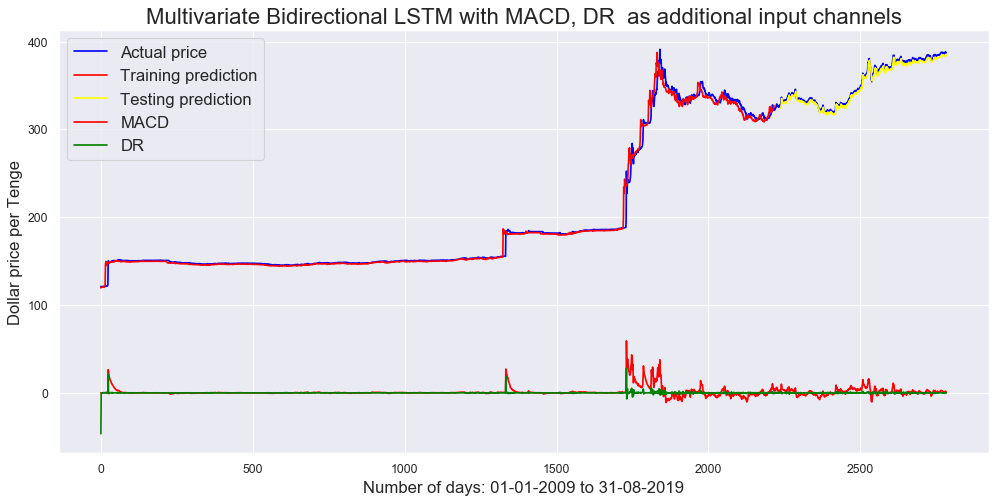

In [8]:
import seaborn as sns
sns.set()

plt.figure(figsize=(15,7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(price, label='Actual price',color='blue')
plt.plot(training_prediction, label='Training prediction', color='red')
plt.plot(test_index[len(test_index)-len(testing_prediction):], testing_prediction, label= 'Testing prediction',color='yellow')
plt.plot(macd, label = 'MACD', color = 'red')
plt.plot(dr, label = 'DR', color = 'green')
# plt.plot(mi, label = 'MI', color = 'black')
# plt.plot(adx, label = 'ADX', color = 'magenta')

plt.title('Multivariate Bidirectional LSTM with MACD, DR  as additional input channels', fontsize=20)
plt.xlabel("Number of days: 01-01-2009 to 31-08-2019", fontsize=15)
plt.ylabel("Dollar price per Tenge", fontsize=15)
plt.legend(fontsize=15)
plt.show()